# Análise de Vendas
Este notebook contém análises dos dados de vendas, produtos e clientes da loja.

In [19]:
import sys
import os

# garantir que a classe databasemanager é importada
sys.path.append(os.path.abspath("C:/Users/tutas/Documents/Projetos GitHUB/ProjetoAnaliseVendas"))




In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from classes.classdatabasemanager import DatabaseManager
from utils.logger_utils import logging

# classe DatabaseManager para poder acedar as tabelas
db_manager = DatabaseManager("../database/loja.db")

# tabelas carregadas em df
df_produtos = db_manager.fetch_data_to_df("SELECT * FROM produtos;")
df_clientes = db_manager.fetch_data_to_df("SELECT * FROM clientes;")
df_vendas = db_manager.fetch_data_to_df("SELECT * FROM vendas;")

# mostrar os primeiros 5 registos
display(df_produtos.head())
display(df_clientes.head())
display(df_vendas.head())


,id,nome,preco
0,1,Produto 1,4872
1,2,Produto 2,2680
2,3,Produto 3,551
3,4,Produto 4,3350
4,5,Produto 5,4180


,id,nome,email
0,1,Cliente 1,cliente1@exemplo.com
1,2,Cliente 2,cliente2@exemplo.com
2,3,Cliente 3,cliente3@exemplo.com
3,4,Cliente 4,cliente4@exemplo.com
4,5,Cliente 5,cliente5@exemplo.com


,id,id_produto,id_cliente,quantidade,data
0,1,24,83,10,2025-01-16
1,2,67,74,6,2025-01-02
2,3,21,40,10,2025-01-17
3,4,99,92,1,2025-01-05
4,5,59,95,1,2025-01-31


In [21]:
#validar colunas
print(df_produtos.columns)
print(df_vendas.columns)
print(df_clientes.columns)

#validar quantas linhas a tabela tem
print(df_produtos.shape)
print(df_vendas.shape)
print(df_clientes.shape)

#valida dados nulos
print(df_produtos.isnull().sum())
print(df_vendas.isnull().sum())
print(df_clientes.isnull().sum())



Index(['id', 'nome', 'preco'], dtype='object')
Index(['id', 'id_produto', 'id_cliente', 'quantidade', 'data'], dtype='object')
Index(['id', 'nome', 'email'], dtype='object')
(100, 3)
(100, 5)
(100, 3)
id       0
nome     0
preco    0
dtype: int64
id            0
id_produto    0
id_cliente    0
quantidade    0
data          0
dtype: int64
id       0
nome     0
email    0
dtype: int64


## Análise 1: Produtos Mais Vendidos
Nesta seção, vamos identificar quais produtos tiveram o maior volume de vendas.


In [22]:
# juntar a tabela vendas pelo id produto com a tabela produtos pelo id
df_merged = df_vendas.merge(df_produtos, left_on="id_produto", right_on="id")

# Calcular total vendido por produto
produtos_mais_vendidos = df_merged.groupby("nome")["quantidade"].sum().sort_values(ascending=False).reset_index()

#tornar a tabela em uma df
produtos_mais_vendidos_df=produtos_mais_vendidos.reset_index()

# Exibir os 10 produtos mais vendidos
display(produtos_mais_vendidos_df.head(10))

,index,nome,quantidade
0,0,Produto 42,42
1,1,Produto 27,32
2,2,Produto 28,18
3,3,Produto 20,17
4,4,Produto 100,17
5,5,Produto 89,17
6,6,Produto 67,17
7,7,Produto 44,16
8,8,Produto 25,16
9,9,Produto 93,16


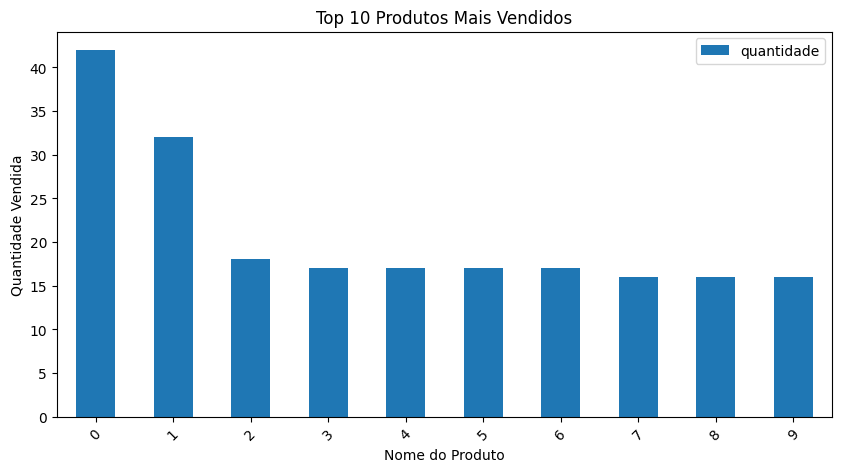

In [23]:
# Criar gráfico de barras
from utils.funcoes import criar_graficos_matplotlib_pyplot, guardar_analise_csv
criar_graficos_matplotlib_pyplot(produtos_mais_vendidos, "Top 10 Produtos Mais Vendidos", "Nome do Produto", "Quantidade Vendida")


In [24]:
#guardar ficheiro top10
guardar_analise_csv(produtos_mais_vendidos_df, "top10_produtos")


✅ Ficheiro guardado em: C:\Users\tutas\Documents\Projetos GitHUB\ProjetoAnaliseVendas\utils\..\data\top10_produtos_2025-01-28.csv
